In [1]:
### IMPORT PACKAGES
from time import sleep
import numpy as np
from qcodes.dataset import do0d, load_or_create_experiment
from qcodes.instrument import Instrument
from qcodes.instrument_drivers.stanford_research import SR830
from qcodes.validators import Numbers
import time
import matplotlib.pyplot as plt

### ESTABLISH LOCK-IN CONNECTION 
lockin = SR830('lockin', 'GPIB0::1::INSTR') # init lock-in connection
lockin.print_readable_snapshot() # check lock-in status

Connected to: Stanford_Research_Systems SR830 (serial:s/n83931, firmware:ver1.07) in 0.24s
lockin:
	parameter       value
--------------------------------------------------------------------------------
IDN              :	{'vendor': 'Stanford_Research_Systems', 'model': 'SR830', ...
P                :	None (deg)
R                :	None (V)
R_offset         :	None 
X                :	None (V)
X_offset         :	None 
Y                :	None (V)
Y_offset         :	None 
amplitude        :	None (V)
aux_in1          :	None (V)
aux_in2          :	None (V)
aux_in3          :	None (V)
aux_in4          :	None (V)
aux_out1         :	None (V)
aux_out2         :	None (V)
aux_out3         :	None (V)
aux_out4         :	None (V)
buffer_SR        :	1 (Hz)
buffer_acq_mode  :	None 
buffer_npts      :	None 
buffer_trig_mode :	None 
ch1_databuffer   :	Not available (V)
ch1_datatrace    :	Not available (V)
ch1_display      :	R 
ch1_ratio        :	none 
ch2_databuffer   :	Not available (V)
ch2_datatrace   

C:\Users\jmborit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\qcodes\instrument\instrument_base.py:143: QCoDeSDeprecationWarning: Parameter ch1_databuffer on instrument lockin does not correctly pass kwargs to its baseclass. A Parameter class must take `**kwargs` and forward them to its baseclass.
  warnings.warn(
C:\Users\jmborit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\qcodes\instrument\instrument_base.py:143: QCoDeSDeprecationWarning: Parameter ch2_databuffer on instrument lockin does not correctly pass kwargs to its baseclass. A Parameter class must take `**kwargs` and forward them to its baseclass.
  warnings.warn(


In [2]:
### DETERMINE LOCK-IN PARAMS
tau = 1 # time constant 
sense = 0.2 # sensivity 
V_ref = 3.5
freq_ref = 100
phi_ref = 0

In [8]:
0.4 / 0.2828

1.4144271570014146

In [7]:
np.sqrt(2)

1.4142135623730951

In [3]:
### SET UP LOCK-IN
lockin.time_constant(tau)
lockin.sensitivity(sense)
lockin.reference_source('internal') # set reference to internal 
lockin.set('amplitude', V_ref) 
lockin.set('frequency', freq_ref)
lockin.set('phase', phi_ref) 

0.49917213268370675


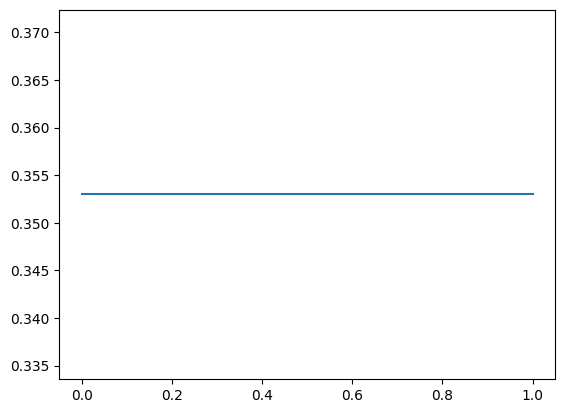

In [10]:
### RUN A TEST: MEASURE V FROM SOURCEMETER
Vs = []
ts = []
dt =0.1
t = 0
while t < 1:
    V = lockin.R()
    #print(V)
    Vs.append(V)
    time.sleep(dt)
    ts.append(t)
    t += dt
plt.plot(ts, Vs)

out = np.mean(Vs) * np.sqrt(2)
print(out)